In [1]:
!pip install docx2txt
import numpy as np
import matplotlib.pyplot as plt
# from scipy import interp
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
# misc toolkit
import warnings
warnings.filterwarnings('ignore')
import itertools
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim
import re
import os
os.chdir(r"C:\Users\akabo\Dropbox\machine learning 2")

You should consider upgrading via the 'c:\users\akabo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import docx2txt
my_text = docx2txt.process(r"C:\Users\akabo\Dropbox\fetch rewards\Fetch Data Science Coding Challenge - Python.docx")
print(my_text)
my_text = my_text.replace("\n\n"," ")

Text Data for Coding Challenge: frankenstein_chpt_1

“Letter 1

To Mrs. Saville, England. <Scrapers<

St. Petersburgh, Dec. 11th, 17—.

You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my $You$ dear sister of my welfare and increasing confidence in the success of my undertaking.

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents $are$ itself to my imagination as the region of beauty 

In [5]:
doc = gensim.utils.simple_preprocess(my_text,min_len=0)
# gensim.utils.simple_preprocess include lower(), split(),re.sub("[^a-zA-Z]","",text)

In [6]:
from collections import Counter
count = dict(Counter(doc))

In [7]:
count
# keep track of the word counts

{'text': 1,
 'data': 1,
 'for': 15,
 'coding': 1,
 'challenge': 1,
 'letter': 2,
 'to': 35,
 'mrs': 1,
 'saville': 1,
 'england': 1,
 'scrapers': 1,
 'st': 2,
 'petersburgh': 3,
 'dec': 1,
 'th': 1,
 'you': 12,
 'will': 5,
 'rejoice': 1,
 'hear': 1,
 'that': 12,
 'no': 3,
 'disaster': 1,
 'has': 3,
 'accompanied': 2,
 'the': 68,
 'commencement': 1,
 'of': 36,
 'an': 6,
 'enterprise': 2,
 'which': 19,
 'have': 8,
 'regarded': 1,
 'with': 12,
 'such': 2,
 'evil': 1,
 'forebodings': 1,
 'i': 46,
 'arrived': 1,
 'here': 1,
 'yesterday': 1,
 'and': 44,
 'my': 42,
 'first': 2,
 'task': 1,
 'is': 9,
 'assure': 1,
 'dear': 4,
 'sister': 3,
 'welfare': 1,
 'increasing': 1,
 'confidence': 1,
 'in': 24,
 'success': 1,
 'undertaking': 3,
 'am': 4,
 'already': 2,
 'far': 2,
 'north': 3,
 'london': 1,
 'as': 9,
 'walk': 1,
 'streets': 1,
 'feel': 2,
 'a': 28,
 'cold': 3,
 'northern': 1,
 'breeze': 2,
 'play': 1,
 'upon': 1,
 'cheeks': 1,
 'braces': 1,
 'nerves': 1,
 'fills': 1,
 'me': 9,
 'delight':

In [272]:
with open("word_count_dict.json", "w") as outfile: 
    json.dump(doc, outfile)
# Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')

# Find the 4 hidden sentences in the text.


In [273]:
def strip_last_punctuation(s):
    if s[-1] in string.punctuation and s[0] in string.punctuation:
        return s

a =[strip_last_punctuation(i) for i in my_text.split(" ")]
list1 = list(filter(None, a))
list1
# try to find the split words with first and last digit as punctuation

['<Scrapers<',
 '$You$',
 '$are$',
 "*You're*",
 '#Found#',
 '*killin*',
 '#another#',
 '<for<',
 '$amazing!$',
 '<the<',
 '*it!*',
 '#one!#']

In [12]:
list2 = re.findall('\W{1,}[\w]+\W{2,}$',my_text)
list2
# it seems that 'Walton<win!<”' is a exception because it can't be splitted by "", so i use regex function to find the word

['<win!<”']

In [ ]:
#\W matches any non-word character (equivalent to [^a-zA-Z0-9_])
#{1} matches the previous token exactly one time (meaningless quantifier)
#Match a single character present in the list below [\w]
#+ matches the previous token between one and unlimited times, as many times as possible, giving back as needed (greedy)
#\w matches any word character (equivalent to [a-zA-Z0-9_])
#\W matches any non-word character (equivalent to [^a-zA-Z0-9_])
#{1,} matches the previous token between one and unlimited times, as many times as possible, giving back as needed (greedy)
#$ asserts position at the end of a line

In [275]:
list1.extend(list2)

In [276]:
pun  = ["<","$","*","#"]

In [283]:
l = []
for d in pun:
    sentence = " ".join([i for i in list1 if i[0] ==d])
    sentence = re.sub(r'''[$#<{}`+=~|.,*"]''', "",sentence)
    l.append(sentence)
    

In [284]:
l # double quote

['Scrapers for the win!”',
 'You are amazing!',
 "You're killin it!",
 'Found another one!']

# Remove the 4 hidden sentences from the original text file and save a clean text

In [237]:
my_text= " ".join([i for i in my_text.split(" ") if i not in list1])

In [246]:
new_text = my_text.split("<")[0]

In [255]:
with open("Clean_Frankenstein.txt", "w") as output:
    output.write(new_text)
# Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')


# Plot a histogram of the count of words by word length for all words

In [259]:
doc = gensim.utils.simple_preprocess(new_text,min_len=0)

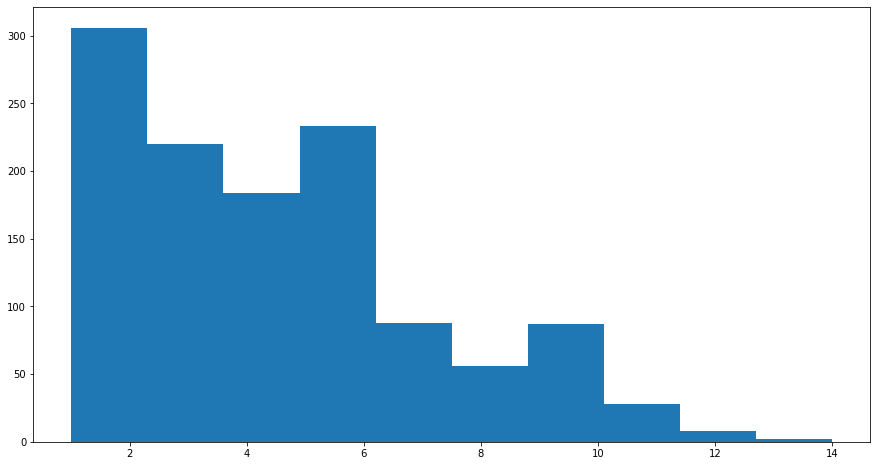

In [264]:
word_lengths= [len(w) for w in doc]
plt.hist(word_lengths)
plt.show()